In [9]:
from pathlib import Path

path_crud = Path(
    "../../Static Analysis/impl-crud/crud_method_complexity.csv")

path_cqrs = Path(
    "../../Static Analysis/impl-es-cqrs/es-cqrs-method-complexity.csv"
)

if not path_crud.exists():
    raise ValueError(f"{path_crud} doesnt exist")

if not path_cqrs.exists():
    raise ValueError(f"{path_cqrs} doesnt exist")

In [10]:
import pandas as pd

crud = pd.read_csv(path_crud, skiprows=1)
cqrs = pd.read_csv(path_cqrs, skiprows=1)

In [13]:
crud = crud.fillna(0)
cqrs = cqrs.fillna(0)

C:\Users\lukas\AppData\Local\Temp\ipykernel_20592\2482356142.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


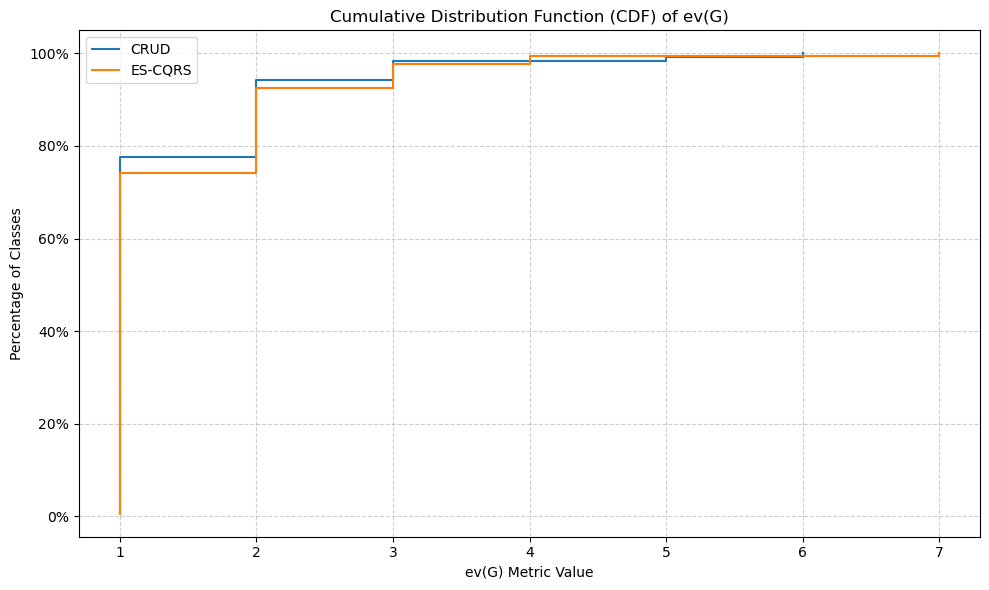

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

column = "ev(G)"

for df, label in zip([crud, cqrs], ["CRUD", "ES-CQRS"]):
    # Sort the data
    data = np.sort(df[column])
    # Calculate cumulative proportions (0 to 1)
    y = np.arange(1, len(data) + 1) / len(data)

    # Use step plot for discrete metrics
    plt.step(data, y, label=label, where='post')

plt.title(f'Cumulative Distribution Function (CDF) of {column}')
plt.xlabel(f'{column} Metric Value')
plt.ylabel('Percentage of Classes')

# Format y-axis to show percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()